# Аналитика для интернет-магазина
Мы занимаемся  аналитикой крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нам нужно проанализировать гипотезы, запустить A/B-тест и проанализировать результаты.


Описание данных


Файл /datasets/hypothesis.csv. Скачать датасет
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Файл /datasets/orders.csv. Скачать датасет
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.


Файл /datasets/visitors.csv. Скачать датасет
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Изучение данных и подготовка их к работе
Для начала давайте посмотрим содержание наших файлов, все ли в порядке с данными.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', 500)

hypothesis=pd.read_csv('/datasets/hypothesis.csv')
orders=pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')
list_of_data=[hypothesis,orders,visitors]
for ever in list_of_data:
    print('----------------------------------------')
    print( ever.head())
    print('----------------------------------------')
    print( ever.info())
    print("Число дубликатов ", ever.duplicated().sum())
    print('----------------------------------------')

----------------------------------------
                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   Reach  Impact  Confidence  Efforts  
0      3      10           8        6  
1      2       5           4       10  
2      8       3           7        3  
3      8       3           3        8  
4      3       1           1        1  
----------------------------

Дубликатов и пропусков в данных нет, нужно только привести столбцы с датами к нужному типу данных. Так же приведем название всех столбцов к нижнему регистру.

In [2]:
orders['date']=pd.to_datetime(orders['date'])
visitors['date']=pd.to_datetime(visitors['date'])
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()
hypothesis.columns = hypothesis.columns.str.lower()


In [3]:
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Для начала применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
Для того чтобы понять в проверку каких гипотез стоит вкладывать деньги, а какие можно не проверять, нужно отсортировать их по "полезности", для этого существует много разные методов. 
### Фреймворк ICE.
Чтобы посчитать ICE SCORE нужно impact * confidence / efforts, то есть влияние и уверенность разделить на усилия.

In [4]:
hypothesis['ICE']=hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

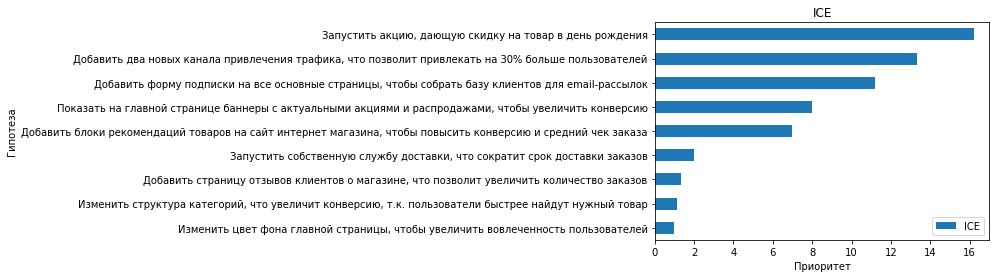

In [5]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

Видно, что на первом месте с небольшим отрывом идет 8 гипотеза -  Запустить акцию, дающую скидку на товар в день..., далее 0 - Добавить два новых канала привлечения трафика... и на третьем месте 7-я -  Добавить форму подписки на все основные страницы... Запомним эти результаты и теперь рассчитаем еще модифицированную версию ICE - RICE.
### Фреймфорк RICE
Чтобы посчитать RICE SCORE нужно reach * impact * confidence / efforts, то есть охват, влияние и уверенность разделить на усилия.

In [6]:
hypothesis['RICE']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

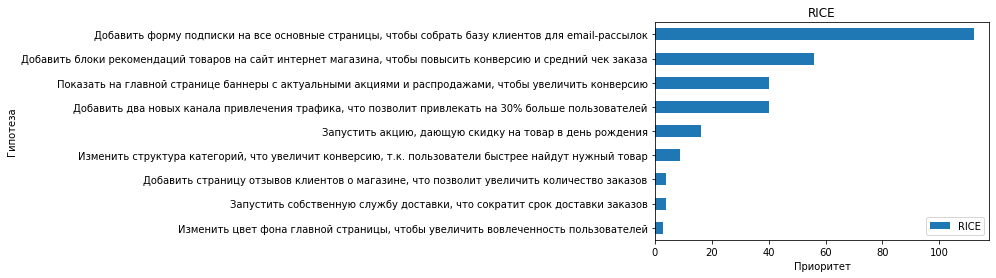

In [7]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

In [8]:
print(hypothesis[['hypothesis','ICE','RICE']])

                                                                                                     hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
7              Добавить форму подписки на все основные страницы, чтобы собрать б


Если вывести таблицк с гипотезами и посмотреть на ICE и на RICE вместе, то видно, что для 7 гипотезы они очень разняться, это связано со спецификой гипотезы. Видно, что не слишком разные показатели имеет 0-ая гипотеза, ICE - 13.3, RICE -40. Может быть стоит сделать вывод в ее сторону, с помощью ее реализации можно будет привлечь новых пользователей. 
    


Так же неплохие показатели у 8-ой гипотезы, но по сравннию с остальными по RICE она конечно проигрывает. Скорее всего это связано с тем, кто она направлена на работу с уже существующими пользователями, поэтому охват у нее ограничен, но эффективность велика. 



Тут на первое место с большим отрывом вырывается 7-я гипотеза, далее примерно с одинаковыми показателями идут 2-я, 0-я и 6-я. 
### Как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

Правильно выбрать гипотезу это очень важно. Действия в гипотезе могут быть направлены на несколько целей - увеличение конверсии, привлечение новых пользователей, удержание текущих пользователей, добавление ценности продукту и отсраивание от конкурентов. 

Видно, что по результатм Rice лидирует гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", а по ICE "Запустить акцию, дающую скидку на товар в день..." Для начала нужно заметить, что по RICE мы получаем гипотезу, которая должна будет увеличить конверсию, а в последующем выручку, ведь рассылка это еще один способ напоминания клиенту о существовании нашего магазина, он увидит письмо на почте и может зайдет на сайт. Лидер же по ICE дал нам гипотезу, которая направлена удержание клиентов и тоже увеличение конверсии. 
Лучше всего будет провести исследование по 7-й гипотезе, ведь RICE учитывает еще охват, значит если мы проведем А/В-тест с условием 7-й гипотезы, у нас может получится охватить больше людей в будущем. 

## Часть 2. Анализ A/B-теста
### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.



In [9]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков.

In [10]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [11]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [12]:
#Объединим обе таблицы в одной с понятными названиями столбцов:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


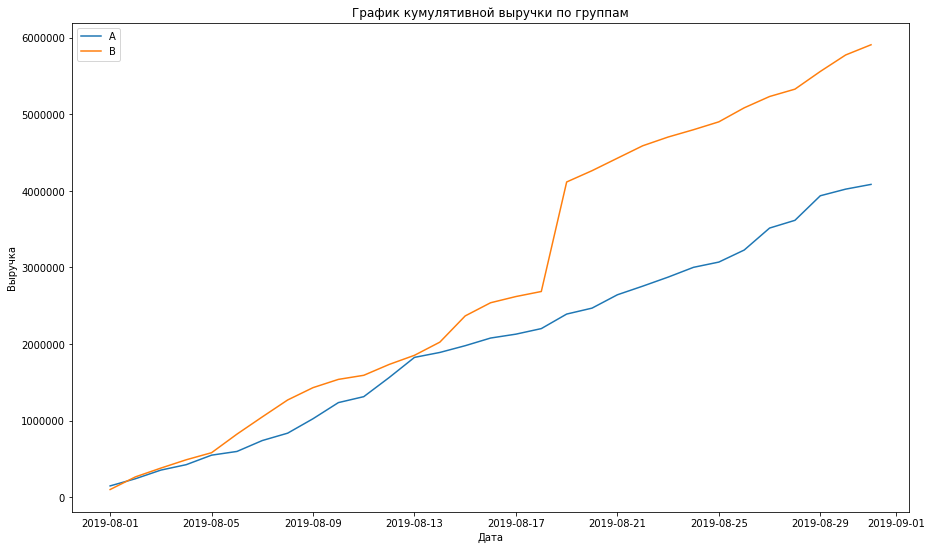

In [13]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,9))
plt.title("График кумулятивной выручки по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

Выручка почти равномерно увеличивается в течении всего теста, это хороший знак. Однако для группы B наблюдается резкий скачек между 2019-08-17 и 2019-08-21. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### Построим  график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

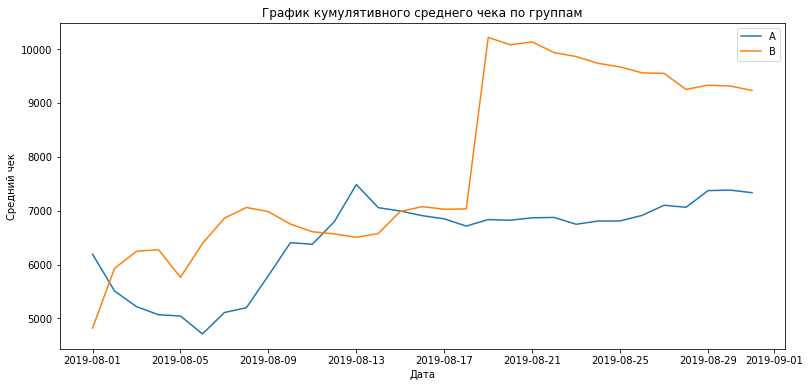

In [14]:
plt.figure(figsize=(13,6))
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

Средний чек равномерен только для группы А и то только после 2019-08-13. До этого виден достаточно резкий спад к 2019-08-05, а потом не менее резкий взлет к 2019-08-13. Для группы В средний чек растет почти все время, но виден очень разкий взлет среднего чека 2019-08-21, похожий скачек мы наблюдали по выручке на графике выше. 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

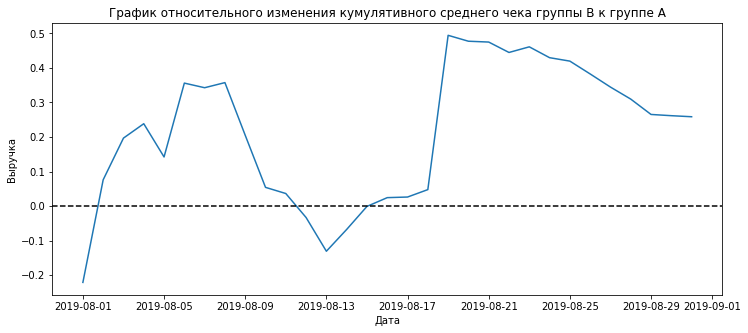

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,5))
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.plot( mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

9 числа произошло что-то,что вызвало достаточно резкий спад, а потом, 13 числа, начался резкий подъем.  Советую отдельно изучить эти дни, взять действия пользователей по часам,например. Также, до спада у нас наблюдаются колебания. Возможно, это предпосылки к спаду. 
    
График ниже нуля здесь означает отрицаельные изменения группы В к А. То есть в начале, у нас группа А лучше по среднему чеку, а потом наоборот.


В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы. 
P.S. что значит когда график опускается ниже нуля? и какие еще можно сделать выводы из этого графика?

### Построим график кумулятивной конверсии по группам. 

['2019-08-01', '2019-08-31', 0.02, 0.04]

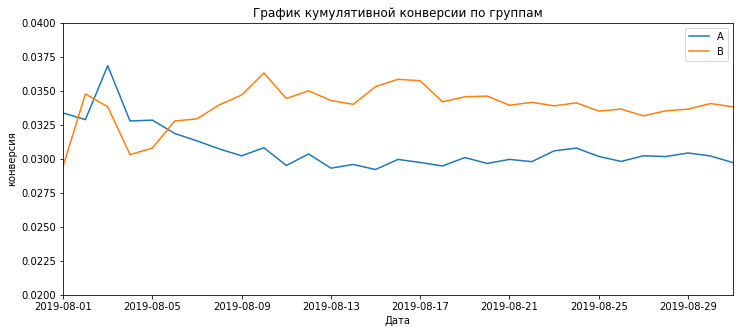

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,5))
plt.title("График кумулятивной конверсии по группам")
plt.xlabel("Дата")
plt.ylabel("конверсия")
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04])

График получился почти симметричный, конверсия меняется от 0,029 до 0,037 для обоих групп. Конверсия для группы А находится в промежутке от 0.0292 до 0.0368, для группы В - от 0.0294 до 0.0363, средняя конверсия группы В больше, чем группы А. Пока группа В показывается лучшие показатели по конверсии.


### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

['2019-08-01', '2019-08-31', -0.6, 0.6]

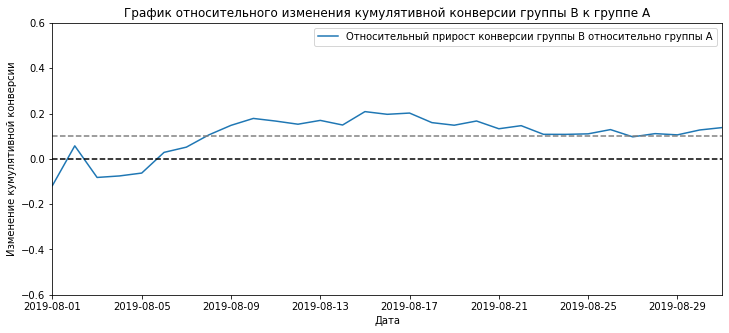

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Изменение кумулятивной конверсии")
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6])

Конверсия группы В сильно стабильнее и лучше конверсии группы А, но количество дней теста не такое большое, так что данные и выводы дальше могу сильно измениться.

### Построим точечный график количества заказов по пользователям. 

       visitorid  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


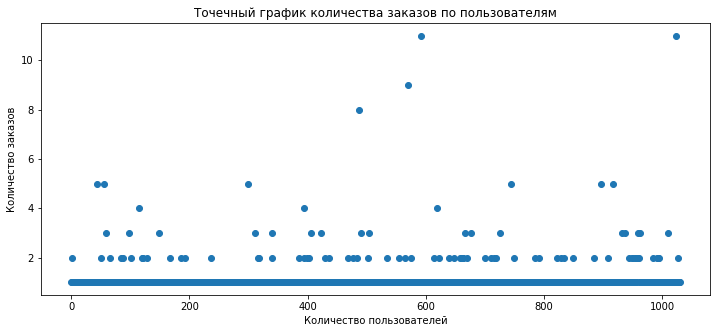

In [18]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorid', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12,5))
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("Количество пользователей")
plt.ylabel("Количество заказов")
plt.scatter(x_values, ordersByUsers['orders']) 

В основной покупают один раз, меньше пользователей покупают 2 раза, еще меньше 3 раза, но есть и те, кто покупает больше 10 раз.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [19]:
import numpy as np
print(np.percentile(ordersByUsers['orders'], [ 95, 99])) 

[2. 4.]


Не больше 5% пользователей покупают больше 2 раз, меньше одного процента покупали больше 4 раз. Границей для определения аномальных пользователей логично будет выбрать 2 заказа.

### Построим точечный график стоимостей заказов. 

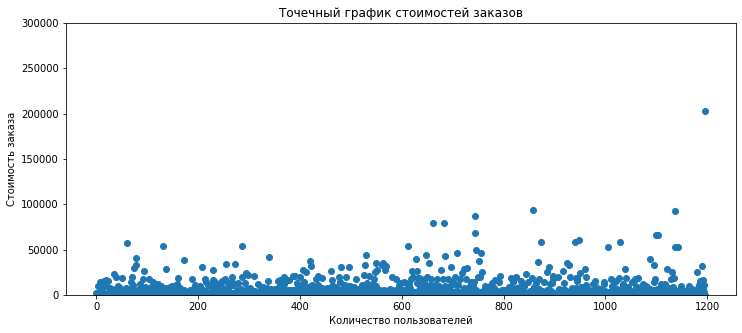

In [20]:
plt.figure(figsize=(12,5))
plt.title("Точечный график стоимостей заказов")
plt.xlabel("Количество пользователей")
plt.ylabel("Стоимость заказа")
plt.ylim(0,300000)
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

Видно, что большинство заказов имеют сумму меньше 5000, но существуют и те, кто покупает на суммы больше 200000, так же я строила график с меньшим пределом по оси y и было видно один заказ на сумму 1300000. 
### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [21]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей, меньше 10% имеют сумму больше 18168. За границу для определения аномальных значений возьмем 30000. 

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

In [24]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [25]:
import scipy.stats as stats
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Статистическая значимость ',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1],alternative='two-sided'))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


Статистическая значимость  0.008
0.138


Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем. Относительный выигрыш группы B равен 13.8% — второе число в выводе.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [26]:
print('Статистическая значимость {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1],alternative='two-sided'))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Статистическая значимость 0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.


### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] >= 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64
(105,)


In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('Статистическая значимость {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1], alternative='two-sided'))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Статистическая значимость 0.008
0.167


P-value меньше 0,05, значит между группами есть статистически значимые различия по конверсии. Относительный выигрыш группы B увеличился до 16.7% — второе число в выводе. 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [29]:
print(
    'Статистическая значимость {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Статистическая значимость 0.408
-0.011


P-value все еще значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако средний чек группы B стал ниже среднего чека группы A, но всего на 1%, значит они почти равны. 
 

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест

Я предлагаю продолжить тест, потому что пока прошло слишком мало времени. Если смотреть на результаты на данный момент, то группа В лидирует и может выйти победителем в этой гонке. Но пока сложно судить, по конверсии группа В лучше, но по среднему чеку различие между группами очень мало. Если целью было увеличить коверсию, то можно делать ставки на группу В, если же целью было увеличить средний чек, то пока сложно судить. Если мы проводили А/В-тест для гипотезы, которую я выбрала в 1 части работы, то пока все идет очень хорошо. 
Что у нас в итоге получается:
   * A/B-тест идет месяц
   * За время теста было сервешно более 1000 заказов
   * График различия по конверсии близок к стабилизации
   * График среднего чека не стабилизировался
   * Есть статистически значимые различия по конверсии между группами как по "сырым", так и по "очищенным данным"
   * Нет статистически значимого различия по среднему чеку между группами как по "сырым", так и по "очищенным данным"

есть смысл остановить тест и зафиксировать победу группы B.